In [2]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import lite
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

In [3]:
pip install yfinance


In [4]:
import yfinance as yf
import datetime as dt


company = "BTC-USD"


start = dt.datetime(2015, 1, 1)
end = dt.datetime(2022, 1, 1)

data = yf.download(company, start=start, end=end)


print(data)


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2015-01-01    320.434998    320.434998    314.002991    314.248993   
2015-01-02    314.079010    315.838989    313.565002    315.032013   
2015-01-03    314.846008    315.149994    281.082001    281.082001   
2015-01-04    281.145996    287.230011    257.612000    264.195007   
2015-01-05    265.084015    278.341003    265.084015    274.473999   
...                  ...           ...           ...           ...   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   
2021-12-30  46490.605469  47879.964844  46060.312500  47178.125000   
2021-12-31  47169.371094  48472.527344  45819.953125  46306.445312   

               Adj Close       Volume  
Date                                   
2015-01-0

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [7]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
79/79 [==============================] - 14s 90ms/step - loss: 0.0073
Epoch 2/15
79/79 [==============================] - 7s 86ms/step - loss: 0.0024
Epoch 3/15
79/79 [==============================] - 8s 100ms/step - loss: 0.0023
Epoch 4/15
79/79 [==============================] - 7s 93ms/step - loss: 0.0018
Epoch 5/15
79/79 [==============================] - 7s 85ms/step - loss: 0.0018
Epoch 6/15
79/79 [==============================] - 7s 95ms/step - loss: 0.0018
Epoch 7/15
79/79 [==============================] - 7s 87ms/step - loss: 0.0016
Epoch 8/15
79/79 [==============================] - 8s 103ms/step - loss: 0.0015
Epoch 9/15
79/79 [==============================] - 10s 124ms/step - loss: 0.0014
Epoch 10/15
79/79 [==============================] - 9s 112ms/step - loss: 0.0013
Epoch 11/15
79/79 [==============================] - 6s 81ms/step - loss: 0.0013
Epoch 12/15
79/79 [==============================] - 8s 103ms/step - loss: 0.0013
Epoch 13/15
79/79 [===========

In [8]:
import yfinance as yf
import datetime as dt
import pandas as pd

# Define the company ticker symbol
company = "BTC-USD"

# Define the start and end dates for the test set
test_start = dt.datetime(2022, 1, 1)
test_end = dt.datetime.now()

# Fetch data for the test set
test_data = yf.download(company, start=test_start, end=test_end)
print("Type of test_data:", type(test_data))
print("test_data:", test_data)

actual_prices = test_data["Close"].values
total_dataset = pd.concat((data["Close"], test_data["Close"]), axis = 0)



[*********************100%%**********************]  1 of 1 completed

Type of test_data: <class 'pandas.core.frame.DataFrame'>
test_data:                     Open          High           Low         Close  \
Date                                                                 
2022-01-01  46311.746094  47827.312500  46288.484375  47686.812500   
2022-01-02  47680.925781  47881.406250  46856.937500  47345.218750   
2022-01-03  47343.542969  47510.726562  45835.964844  46458.117188   
2022-01-04  46458.851562  47406.546875  45752.464844  45897.574219   
2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   
...                  ...           ...           ...           ...   
2024-04-01  71333.484375  71342.093750  68110.695312  69702.148438   
2024-04-02  69705.023438  69708.382812  64586.593750  65446.972656   
2024-04-03  65446.671875  66914.320312  64559.898438  65980.812500   
2024-04-04  65975.695312  69291.257812  65113.796875  68508.843750   
2024-04-06  67845.937500  68138.195312  67532.992188  67981.382812   

               Adj Cl

In [9]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values # Important
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)


In [10]:
# Loop for making predictions
for x in range(prediction_days-1):


    # Make Predictions on Test Data
    x_test = []

    for x in range(prediction_days, len(model_inputs)+1):
        x_test.append(model_inputs[x-prediction_days:x, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    predicted_prices = model.predict(x_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)


26/26 [==============================] - 1s 25ms/step


In [11]:

    # Predict Next Day
    real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

    # Formatting the prediction and printing it
    prediction = model.predict(real_data)
    prediction = scaler.inverse_transform(prediction)
    print(f"Prediction: {prediction}\n")

    # Adding the prediction back into the model for the next prediction
    model_prediction_input = prediction
    model_prediction_input = model_prediction_input.reshape(-1, 1)
    model_prediction_input = scaler.transform(model_prediction_input)
    model_inputs = np.concatenate((model_inputs, model_prediction_input))

1/1 [==============================] - 1s 1s/step
Prediction: [[66785.91]]



In [12]:
output = model.predict(real_data)
output = scaler.inverse_transform(output)
print(f"Prediction for 60 days: {output}")




tf.keras.models.save_model(model,"btc.pbtxt")
converter = lite.TFLiteConverter.from_keras_model(model = model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
tf.lite.OpsSet.SELECT_TF_OPS]
model_tflite = converter.convert()
open("BTCPrediction.tflite", "wb").write(model_tflite)


1/1 [==============================] - 0s 41ms/step
Prediction for 60 days: [[66785.91]]


78800

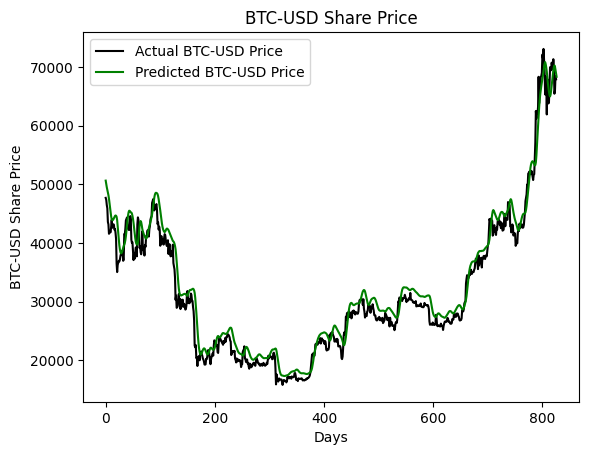

In [ ]:
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Days")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()
